<a href="https://colab.research.google.com/github/iupui-soic/pybootcamp/blob/main/chapter_3_chandra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys

assert sys.version_info >= (3, 7)


In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:
from pathlib import Path

# Define the path to save images for classification
IMAGES_PATH = Path() / "images" / "classification"
# Create the directory if it doesn't exist
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## MNIST

In [ ]:
# Fetch the MNIST dataset from OpenML
# The dataset contains 70,000 images of handwritten digits (0-9)
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:65: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:100: UserWarning: A network error occurred while downloading https://openml.org/api/v1/json/data/qualities/554. Retrying...
  warn(


In [ ]:
# Display the keys of the MNIST dataset dictionary
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
# Assign the data and target from the MNIST dataset to variables X and y
X, y = mnist.data, mnist.target
# Display the data (features)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X.shape

(70000, 784)

In [ ]:
## Display the target values (labels)
y


array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
y.shape

(70000,)

In [ ]:
# Each image in the MNIST dataset is 28x28 pixels, resulting in 784 features
28 * 28

784

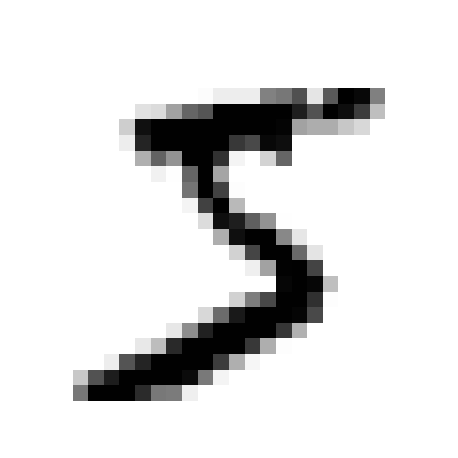

In [ ]:
import matplotlib.pyplot as plt

# Function to plot a single digit image
def plot_digit(image_data):
    # Reshape the image data to 28x28 pixels
    image = image_data.reshape(28, 28)
    # Display the image using a binary color map (black and white)
    plt.imshow(image, cmap="binary")
    # Turn off the axis
    plt.axis("off")

# Select the first image from the dataset
some_digit = X[0]
# Plot the selected digit
plot_digit(some_digit)
# Save the plot
save_fig("some_digit_plot")
# Show the plot
plt.show()

In [ ]:
# Display the label of the first image in the dataset
y[0]

'5'

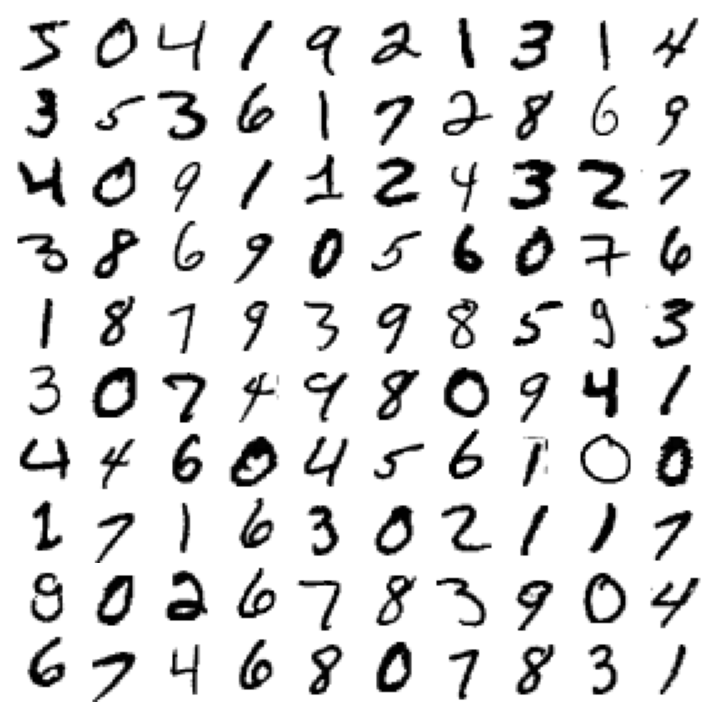

In [ ]:
# Create a figure with a size of 9x9 inches
plt.figure(figsize=(9, 9))

# Plot the first 100 images in a 10x10 grid
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)

# Adjust the layout to remove spacing between subplots
plt.subplots_adjust(wspace=0, hspace=0)

# Save the plot
save_fig("more_digits_plot", tight_layout=False)

# Display the plot
plt.show()

In [ ]:
# Split the data into training and test sets
# The first 60,000 samples are used for training
# The remaining 10,000 samples are used for testing
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Training a Binary Classifier

In [ ]:
# Create target vectors for binary classification
# y_train_5 is True for all training samples labeled as '5', False otherwise
# y_test_5 is True for all test samples labeled as '5', False otherwise
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [ ]:
from sklearn.linear_model import SGDClassifier

# Initialize the Stochastic Gradient Descent (SGD) classifier
sgd_clf = SGDClassifier(random_state=42)

# Train the SGD classifier on the training data to detect the digit '5'
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([some_digit])

array([ True])

### Additional model (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create target vectors for binary classification
# y_train_5 is True for all training samples labeled as '5', False otherwise
# y_test_5 is True for all test samples labeled as '5', False otherwise
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

# Initialize the KNN classifier with k=3 (you can choose different values for k)
knn_clf = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier
knn_clf.fit(X_train, y_train_5)

# Make predictions on the test data using KNN
y_test_pred_knn = knn_clf.predict(X_test)

# Evaluate the KNN model's performance
accuracy_knn = accuracy_score(y_test_5, y_test_pred_knn)
conf_matrix_knn = confusion_matrix(y_test_5, y_test_pred_knn)
class_report_knn = classification_report(y_test_5, y_test_pred_knn)

# Print the evaluation metrics for KNN
print("KNN Classifier:")
print(f"Accuracy: {accuracy_knn}")
print("Confusion Matrix:")
print(conf_matrix_knn)
print("Classification Report:")
print(class_report_knn)

KNN Classifier:
Accuracy: 0.9938
Confusion Matrix:
[[9080   28]
 [  34  858]]
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9108
        True       0.97      0.96      0.97       892

    accuracy                           0.99     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.99      0.99      0.99     10000



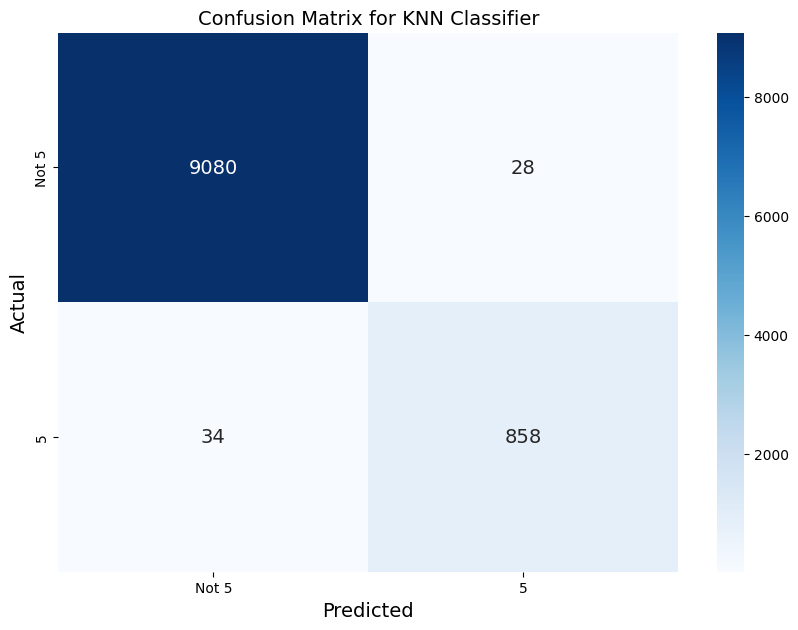

In [ ]:
# Plot the confusion matrix
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Not 5', '5'], yticklabels=['Not 5', '5'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

The confusion matrix for the KNN classifier is a 2x2 grid that summarizes the performance of the classifier by comparing the predicted labels with the actual labels. Here’s an explanation of each square:

### Confusion Matrix Breakdown

\[
\begin{array}{|c|c|c|}
\hline
\text{} & \text{Predicted Not 5} & \text{Predicted 5} \\
\hline
\text{Actual Not 5} & 9080 & 28 \\
\hline
\text{Actual 5} & 34 & 858 \\
\hline
\end{array}
\]

### Explanation of Each Square:

1. **Top-left square (9080): True Negatives (TN)**
   - **Description:** This represents the number of samples that are actually not '5' and were correctly predicted as not '5' by the classifier.
   - **Significance:** High values here indicate that the classifier is good at identifying samples that are not '5'.

2. **Top-right square (28): False Positives (FP)**
   - **Description:** This represents the number of samples that are actually not '5' but were incorrectly predicted as '5' by the classifier.
   - **Significance:** Lower values here are better, as it means the classifier is making fewer mistakes by incorrectly labeling non-'5' samples as '5'.

3. **Bottom-left square (34): False Negatives (FN)**
   - **Description:** This represents the number of samples that are actually '5' but were incorrectly predicted as not '5' by the classifier.
   - **Significance:** Lower values here are better, as it means the classifier is making fewer mistakes by failing to identify '5' samples.

4. **Bottom-right square (858): True Positives (TP)**
   - **Description:** This represents the number of samples that are actually '5' and were correctly predicted as '5' by the classifier.
   - **Significance:** High values here indicate that the classifier is good at correctly identifying samples that are '5'.

### Summary
- **True Negatives (TN = 9080):** The classifier correctly identified 9080 samples as not '5'.
- **False Positives (FP = 28):** The classifier incorrectly identified 28 samples as '5' when they were not '5'.
- **False Negatives (FN = 34):** The classifier incorrectly identified 34 samples as not '5' when they were actually '5'.
- **True Positives (TP = 858):** The classifier correctly identified 858 samples as '5'.

## Performance measures

### Measuring Accuracy Using Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for the SGDClassifier
# The accuracy score will be calculated using 3-fold cross-validation
sgd_accuracy_scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

# Display the cross-validation accuracy scores
sgd_accuracy_scores

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# Initialize the StratifiedKFold with 3 splits
# Add shuffle=True if the dataset is not already shuffled
skfolds = StratifiedKFold(n_splits=3)

# Perform Stratified K-Fold cross-validation
for train_index, test_index in skfolds.split(X_train, y_train_5):
    # Clone the classifier to ensure a fresh model for each fold
    clone_clf = clone(sgd_clf)

    # Create the training and testing folds
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    # Train the classifier on the training fold
    clone_clf.fit(X_train_folds, y_train_folds)

    # Predict on the test fold
    y_pred = clone_clf.predict(X_test_fold)

    # Calculate the number of correct predictions
    n_correct = sum(y_pred == y_test_fold)

    # Print the accuracy for this fold
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


In [ ]:
from sklearn.dummy import DummyClassifier

# Initialize the DummyClassifier
dummy_clf = DummyClassifier()

# Train the DummyClassifier on the training data
dummy_clf.fit(X_train, y_train_5)

# Predict on the training data and check if any prediction is True
# This checks if the DummyClassifier predicts any positive class
print(any(dummy_clf.predict(X_train)))

False


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for the DummyClassifier
# The accuracy score will be calculated using 3-fold cross-validation
dummy_accuracy_scores = cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

# Display the cross-validation accuracy scores for DummyClassifier
dummy_accuracy_scores

array([0.90965, 0.90965, 0.90965])

## Confusion Matrix

In [ ]:
from sklearn.model_selection import cross_val_predict

# Perform cross-validation predictions for the SGDClassifier
# The target predictions will be calculated using 3-fold cross-validation
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
# Import the confusion_matrix function from the sklearn.metrics module
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix using the actual labels (y_train_5) and the predicted labels (y_train_pred)
# y_train_5: Actual labels
# y_train_pred: Predicted labels
cm = confusion_matrix(y_train_5, y_train_pred)

# Print the confusion matrix
cm

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
# Assigning y_train_5 to y_train_perfect_predictions to pretend perfect predictions
y_train_perfect_predictions = y_train_5

# Compute the confusion matrix using the actual labels (y_train_5) and the perfect predicted labels (y_train_perfect_predictions)
# y_train_5: Actual labels
# y_train_perfect_predictions: Perfectly predicted labels (same as actual labels)
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

## Precision and Recall

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [ ]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

### Precision/Recall Trade-off

In [ ]:
# Select a digit from the dataset
some_digit = X[0]

# Calculate the decision score for some_digit
# Positive score: classifier predicts '5'
# Negative score: classifier predicts not '5'
y_scores = sgd_clf.decision_function([some_digit])

# Print the decision score
y_scores


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [ ]:
y_some_digit_pred

array([ True])

In [ ]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

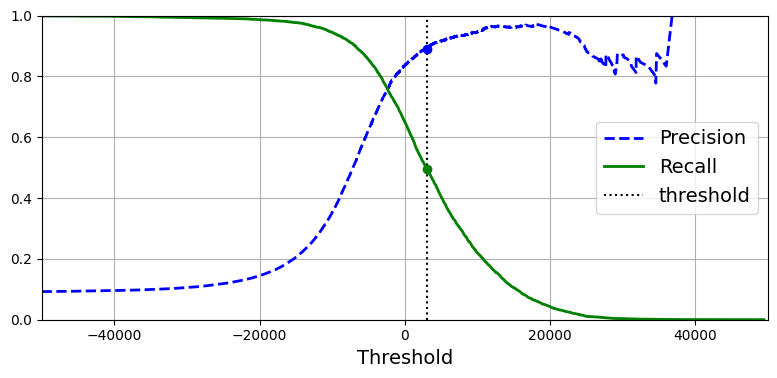

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
save_fig("precision_recall_vs_threshold_plot")

plt.show()


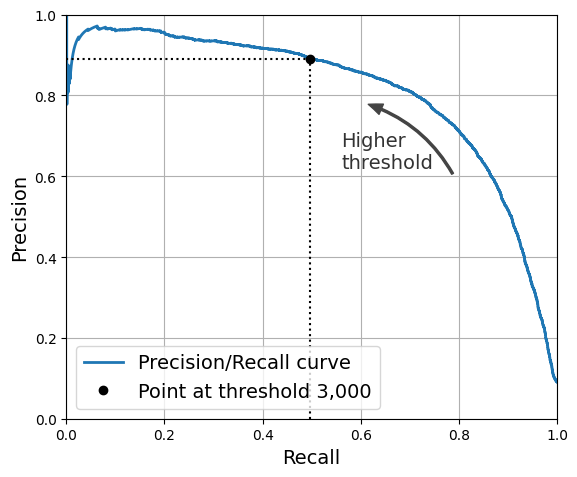

In [ ]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
save_fig("precision_vs_recall_plot")

plt.show()

In [ ]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [ ]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)


In [ ]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [ ]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision


0.4799852425751706

## The ROC Curve

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

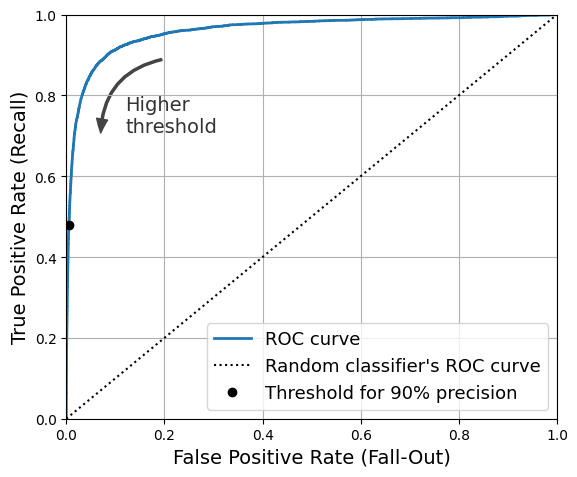

In [ ]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
save_fig("roc_curve_plot")

plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)


0.9604938554008616

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [ ]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [ ]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

##### These are estimated probabilities. Among the images that the model classified as positive with a probability between 50% and 60%, there are actually about 94% positive images:

In [ ]:
# Not in the code
idx_50_to_60 = (y_probas_forest[:, 1] > 0.50) & (y_probas_forest[:, 1] < 0.60)
print(f"{(y_train_5[idx_50_to_60]).sum() / idx_50_to_60.sum():.1%}")

94.0%


In [ ]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest)

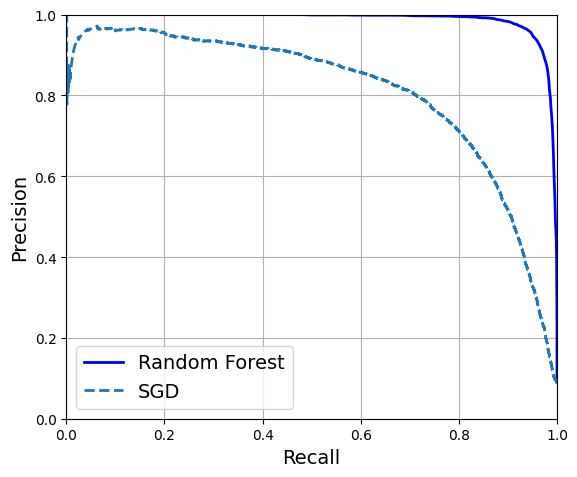

In [ ]:
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

# extra code – just beautifies and saves Figure 3–8
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
save_fig("pr_curve_comparison_plot")

plt.show()

#### We could use cross_val_predict(forest_clf, X_train, y_train_5, cv=3) to compute y_train_pred_forest, but since we already have the estimated probabilities, we can just use the default threshold of 50% probability to get the same predictions much faster:

In [ ]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # positive proba ≥ 50%
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [ ]:
precision_score(y_train_5, y_train_pred_forest)


0.9897468089558485

In [ ]:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

### Multiclass Classification

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])  # y_train, not y_train_5

SVC(random_state=42)

In [ ]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [ ]:
class_id = some_digit_scores.argmax()
class_id

5

In [ ]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [ ]:
svm_clf.classes_[class_id]

'5'

In [ ]:
# extra code – shows how to get all 45 OvO scores if needed
svm_clf.decision_function_shape = "ovo"
some_digit_scores_ovo = svm_clf.decision_function([some_digit])
some_digit_scores_ovo.round(2)

array([[ 0.11, -0.21, -0.97,  0.51, -1.01,  0.19,  0.09, -0.31, -0.04,
        -0.45, -1.28,  0.25, -1.01, -0.13, -0.32, -0.9 , -0.36, -0.93,
         0.79, -1.  ,  0.45,  0.24, -0.24,  0.25,  1.54, -0.77,  1.11,
         1.13,  1.04,  1.2 , -1.42, -0.53, -0.45, -0.99, -0.95,  1.21,
         1.  ,  1.  ,  1.08, -0.02, -0.67, -0.14, -0.3 , -0.13,  0.25]])

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [ ]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [ ]:
len(ovr_clf.estimators_)

10

In [ ]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [ ]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])